In [1]:
# DEEP LEARNING A01
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'HW1_poisson_regression_data.csv'
# load data 

df = pd.read_csv(file_path)

df.head() # display data 


/var/folders/np/gq4pf7wx2b1btsznkmxtvtzh0000gn/T/ipykernel_47855/2378859799.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Y,X1,X2,X3,X4,X5
0,5,0.422447,0.971883,0.533636,0.058229,0.912143
1,2,0.382487,0.507943,0.950425,0.174120,0.551095
2,4,0.742815,0.789894,0.374025,0.320585,0.286143
3,6,0.905309,0.093778,0.552340,0.909098,0.836523
4,7,0.557285,0.567502,0.552205,0.988464,0.989089


In [2]:
y=df['Y'] # target column
prediction_vars=['X1','X2','X3','X4','X5']
X=df[prediction_vars]
X['B']=1 # adding bias col 

In [3]:


class PoissonRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(PoissonRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.exp(self.linear(x))
    def MSE(self,x,y):
        y_h=torch.exp(torch.matmul(x,self.linear.weight.T))
        return torch.norm(y-y_h)
        
def poisson_loss(predictions, targets):
    return torch.mean(predictions - targets * torch.log(predictions))

input_size = df.shape[1]
n=df.shape[0]
model = PoissonRegressionModel(input_size)
optimizer = optim.SGD(model.parameters(), lr=0.01)

tensor_data_X = torch.tensor(X.values, dtype=torch.float32)
tensor_data_y = torch.tensor(y.values, dtype=torch.float32)


epochs = 1000
losses=[]
val_accuracies=[]
for epoch in range(epochs):
    predictions = model(tensor_data_X)
    loss = poisson_loss(predictions, tensor_data_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    # y_=tensor_data_y.detach().numpy()
    # preds=predictions.detach().numpy()
    # val_accuracy = accuracy_score(y_, preds)
    # val_accuracies.append(val_accuracy)

    # Print loss for monitoring
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')
        # print(f'MSE :: {model.MSE(tensor_data_X,tensor_data_y)}')

# After training, you can access the regression weights
weights = model.linear.weight.data.numpy()

print("Poisson Regression Weights:", weights)
mse = model.MSE(tensor_data_X,tensor_data_y)
print(f'Mean Squared Error on complete data Set: {mse/n}')


Epoch 0, Loss: 3.096318006515503
Epoch 100, Loss: -1.7333523035049438
Epoch 200, Loss: -1.7455695867538452
Epoch 300, Loss: -1.753294825553894
Epoch 400, Loss: -1.7582199573516846
Epoch 500, Loss: -1.7613834142684937
Epoch 600, Loss: -1.763427972793579
Epoch 700, Loss: -1.764756441116333
Epoch 800, Loss: -1.765623927116394
Epoch 900, Loss: -1.7661919593811035
Poisson Regression Weights: [[0.03189939 0.04381549 0.01808241 0.02651459 0.02039742 0.4565913 ]]
Mean Squared Error on complete data Set: 4.800190448760986


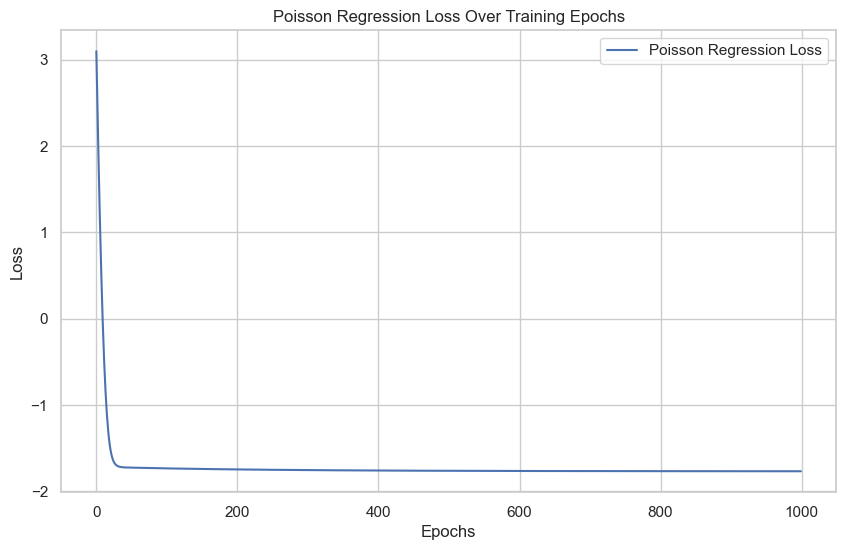

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(epochs), y=losses, label='Poisson Regression Loss')
plt.title('Poisson Regression Loss Over Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()